In [5]:
    ## Lib's para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    ## Lib de gráficos
import plotly.express as px

from fredapi import Fred


In [8]:
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fred_key ='a675af3fce6d38188d7fb67d4899031b'


In [9]:
    #crate a Fred object

fred = Fred(api_key=fred_key)

In [16]:
    # Search for economic data
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-20,2024-01-20,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-01-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-19 08:09:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-20,2024-01-20,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-01-20,2024-01-20,S&P 500,2014-01-21,2024-01-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-01-19 19:11:02-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-20,2024-01-20,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-01-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-19 08:09:07-06:00,82,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2024-01-20,2024-01-20,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...


<Axes: title={'center': 'S&P 500'}>

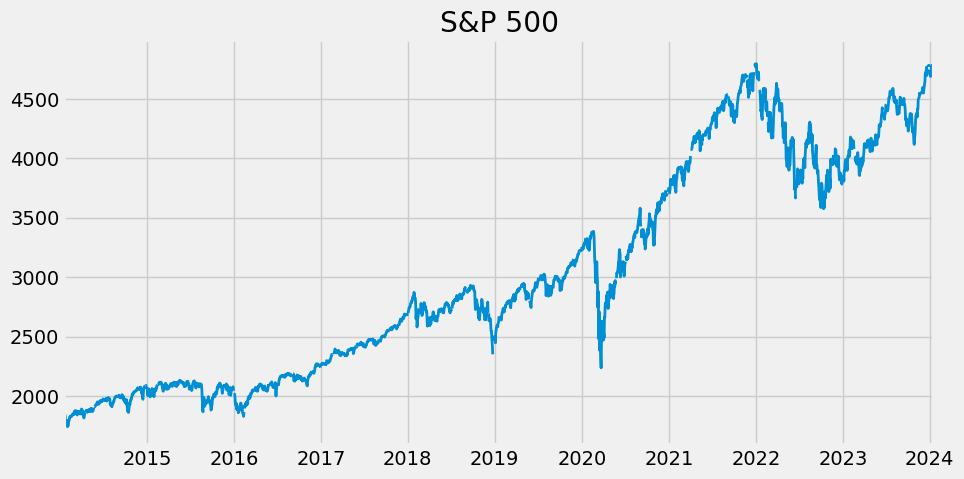

In [21]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

In [26]:
uemp_results = fred.search('unemployment')
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
Length: 912, dtype: float64

<Axes: >

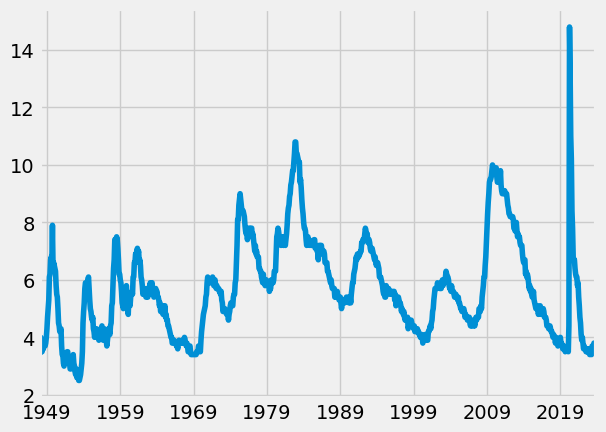

In [28]:
unrate.plot()

In [35]:
unemp_df = fred.search('unemployment state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]